## QLIPP CALIBRATION NOTEBOOK

In [1]:
import time
import os, sys
from pycromanager import Bridge

p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.append(p)
import numpy as np
from recOrder.recOrder.calib.Calibration import QLIPP_Calibration
from recOrder.recOrder.calib.CoreFunctions import snap_image

In [2]:
bridge = Bridge(convert_camel_case=False)
mmc = bridge.get_core()
mm = bridge.get_studio()

calib = QLIPP_Calibration()
calib.mmc = mmc
calib.mm = mm
calib.print_details = True

### Notes Before you begin:

* Choose a field of view with no sample for calibration
* Decide whether you want a 4-State Scheme (faster) or a 5-State Scheme (slower, slightly more sensitive?)

Calculating Blacklevel ...
Blacklevel: 103.67313243150711

Calibrating State0 (Extinction)...

Starting first grid search, step = 0.1
update (65535.000000, 0.010000, 0.250000)
update (65516.701889, 0.010000, 0.450000)
update (60379.642030, 0.010000, 0.550000)
update (44909.282045, 0.110000, 0.550000)
update (40357.447025, 0.210000, 0.450000)
update (12854.699394, 0.210000, 0.550000)
update (7509.123456, 0.310000, 0.550000)
update (6038.839105, 0.310000, 0.650000)
coarse search done
better lca = 0.31000000000000005
better lcb = 0.6499999999999999
better int = 6038.839105129242
grid search done
lca = 0.31000000000000005
lcb = 0.6499999999999999
intensity = 6038.839105129242

Starting fine search
iteration: 1
	Optimize lca ...
	lca = 0.28639
	lcb = 0.65000
	Intensity = 5336.520039796829
	Intensity Difference = 5047.4474771%

	Optimize lcb ...
	lca = 0.28640
	lcb = 0.58824
	Intensity = 1171.566305398941
	Intensity Difference = 1030.0577864%
iteration: 2
	Optimize lca ...
	lca = 0.28194
	lc

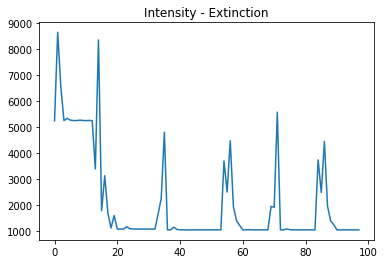

--------done--------


Calibrating State1 (I0)...
setting LCA = 0.2319
setting LCB = 0.5877


Intensity = 5148.569499015808
--------done--------

Calibrating State2 (I45)...
iteration: 1
	Optimize lcb ...
	lca = 0.28190
	lcb = 0.53913
	Intensity = 7977.235498428345
	Intensity Difference = 54.9408141%
iteration: 2
	Optimize lcb ...
	lca = 0.28190
	lcb = 0.54096
	Intensity = 7612.184786319733
	Intensity Difference = 47.8504813%
iteration: 3
	Optimize lcb ...
	lca = 0.28190
	lcb = 0.54244
	Intensity = 7313.63586974144
	Intensity Difference = 42.0518043%
iteration: 4
	Optimize lcb ...
	lca = 0.28190
	lcb = 0.54413
	Intensity = 6990.1854293346405
	Intensity Difference = 35.7694682%
iteration: 5
	Optimize lcb ...
	lca = 0.28190
	lcb = 0.54588
	Intensity = 6634.7514226436615
	Intensity Difference = 28.8659194%
Exceeded 5 Iterations: Search discontinuing
Lowest Inten: [1486.18192363], lca = [0.2819], lcb = [0.54588159]
setting LCA = 0.2819
setting LCB = 0.5459




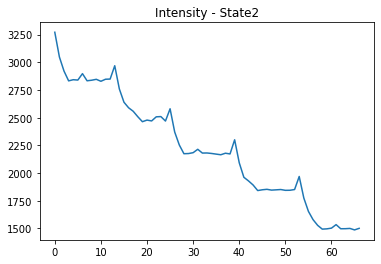

--------done--------

Calibrating State3 (I90)...
iteration: 1
	Optimize lca ...
	lca = 0.33155
	lcb = 0.58770
	Intensity = 5148.998160600662
	Intensity Difference = 0.0083258%
setting LCA = 0.3315
setting LCB = 0.5877




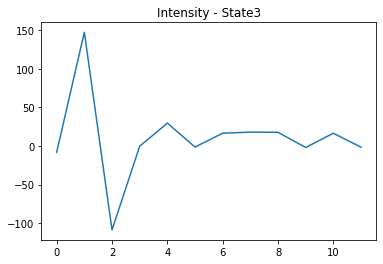

--------done--------

Calibrating State4 (I135)...
iteration: 1
	Optimize lcb ...
	lca = 0.28190
	lcb = 0.63876
	Intensity = 5873.405076503754
	Intensity Difference = 14.0783877%
iteration: 2
	Optimize lcb ...
	lca = 0.28190
	lcb = 0.63986
	Intensity = 5785.935829162598
	Intensity Difference = 12.3794839%
iteration: 3
	Optimize lcb ...
	lca = 0.28190
	lcb = 0.64097
	Intensity = 5696.264021396637
	Intensity Difference = 10.6377999%
iteration: 4
	Optimize lcb ...
	lca = 0.28190
	lcb = 0.64206
	Intensity = 5618.40967297554
	Intensity Difference = 9.1256450%
iteration: 5
	Optimize lcb ...
	lca = 0.28190
	lcb = 0.64352
	Intensity = 5475.315166473389
	Intensity Difference = 6.3463389%
Exceeded 5 Iterations: Search discontinuing
Lowest Inten: [326.74566746], lca = [0.2819], lcb = [0.64351641]
setting LCA = 0.2819
setting LCB = 0.6435




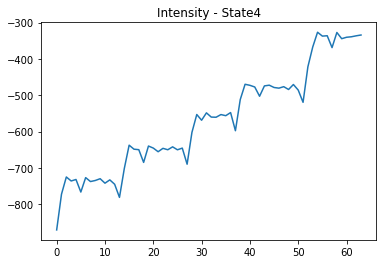

--------done--------

=======Finished Calibration=======

EXTINCTION = 198.95318036071367
Wall time: 3min 51s


In [3]:
%%time
# Define Parameters
calibration_scheme = '4-State Extinction'
# calibration_scheme = '5-State'
swing = 0.05
wavelength = 546
use_full_FOV = True
method = 'brent'
meta_dir = 'Q:\\Cameron\\Calibration_Testing\\'

# Run Calibration
calib.run_calibration(calibration_scheme, options=(swing, wavelength, meta_dir, method, use_full_FOV))

In [ ]:
## Take set of BG Images

directory = 'Q:\\Janie\\2021_02_25_40x_04NA_A549\\Calibration\\SLIDEB\\BG'

n_avg = 8

if calibration_scheme == '5-State':
    calib.capture_bg(n_avg, 5, directory)

elif calibration_scheme == '4-State Extinction':
    calib.capture_bg(n_avg, 4, directory)